In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Importing the csv file

train = pd.read_csv(r"D:\DATA ANALYST\Course\Module 17 - Capstone Project 4\PUBG Dataset\train_V2.csv")

In [17]:
# Changing the table display settings so that we can view all 29 columns
pd.set_option("max_columns", None)

# Display first 5 rows of the dataframe
train.head()

# Reset table display settings to default, if needed.
# pd.reset_option(“max_columns”)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [143]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [144]:
# Displaying count by matchId in original dataframe "train"
train["matchId"].value_counts()

34ce889e8dfac5    100
1d9929caa8c009    100
7c64d2bc26824a    100
9ba9307c281aee    100
f3d09339bb5e25    100
                 ... 
9f2b49358564ea      6
39d2800dad8ae6      6
8aa5066c4b6a79      5
e5a77433bc436f      2
224a123c53e008      1
Name: matchId, Length: 47965, dtype: int64

In [145]:
#Displaying "train" aggregates
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,2.299759e+01,1.579506e+03,4.450467e+01,4.300759e+01,8.920105e+02,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,5.097262e+01,2.587399e+02,2.382811e+01,2.328949e+01,7.366478e+02,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,2.132000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.094000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [146]:
#Displaying count by "killPlace" from "train"

train.killPlace.value_counts()

1      47965
2      47964
3      47962
4      47962
5      47962
       ...  
97     16080
98     10005
99      4461
100     1415
101        1
Name: killPlace, Length: 101, dtype: int64

In [3]:
# Removed rows where count by unique matchId do not add up to 100.

new_df = train.groupby("matchId").filter(lambda x: len(x) == 100)

In [233]:
# Examine "new_df"

print("Number of rows in new_df:")
print(len(new_df))
print(new_df.describe())

Number of rows in new_df:
141400
             assists         boosts    damageDealt          DBNOs  \
count  141400.000000  141400.000000  141400.000000  141400.000000   
mean        0.256386       1.055481     131.062783       0.750905   
std         0.603142       1.643930     164.083689       1.197764   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000      87.300000       0.000000   
75%         0.000000       2.000000     188.100000       1.000000   
max         8.000000      21.000000    2339.000000      18.000000   

       headshotKills          heals      killPlace     killPoints  \
count  141400.000000  141400.000000  141400.000000  141400.000000   
mean        0.219562       1.343692      50.500000     597.640332   
std         0.565872       2.604338      28.866172     653.499187   
min         0.000000       0.000000       1.000000       0.000000   


In [4]:
# Extracted rows that are not special event game modes and not custom game modes based on "matchType"
new_df2 = new_df.loc[new_df["matchType"].isin(["squad-fpp", "duo-fpp", "solo-fpp", "squad", "duo", "solo"])].sort_values(by = ["matchId"]).reset_index(drop = True)

#Checking the value_counts of matchType
print("Count by matchType:")
print()
print(new_df2["matchType"].value_counts())
print()

# Checking dataframe
print("Number of rows in new_df2:")
print(len(new_df2))
print()
print(new_df2.describe())
print()
print(new_df2.head())


new_df2["matchType"].value_counts()

Count by matchType:

squad-fpp    81100
duo-fpp      24000
squad        19100
solo-fpp     10800
duo           4000
solo          2300
Name: matchType, dtype: int64

Number of rows in new_df2:
141300

             assists         boosts    damageDealt          DBNOs  \
count  141300.000000  141300.000000  141300.000000  141300.000000   
mean        0.256461       1.055513     131.096225       0.751111   
std         0.603204       1.644092     164.106340       1.197983   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000      87.360000       0.000000   
75%         0.000000       2.000000     188.200000       1.000000   
max         8.000000      21.000000    2339.000000      18.000000   

       headshotKills          heals      killPlace     killPoints  \
count  141300.000000  141300.000000  141300.000000  141300.000000   
mean        0.219682       1.343984    

In [10]:
# Create dummy variable for "matchType"

new_df3 = pd.get_dummies(new_df2, columns = ["matchType"])

print("Number of rows in new_df3:")
print(len(new_df3))
print()
print(new_df3.head())

Number of rows in new_df3:
141300

               Id         groupId         matchId  assists  boosts  \
0  98725d17e8c4c3  6ecd91f07cc98d  0003b92987589e        1       0   
1  012b7cf29913bc  b2db9f37f1465a  0003b92987589e        0       0   
2  5a1554e0e46471  93a9b85af97b33  0003b92987589e        0       2   
3  0b9f9ad4201886  f4327a7b8ff7c5  0003b92987589e        0       0   
4  b3c7504ba47ba2  3ce8d5fa426e97  0003b92987589e        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  walkDistance  \
0        228.4      1              0      3         14  ...        901.00   
1          0.0      0              0      0         62  ...        738.60   
2          0.0      0              0      3         57  ...       1081.00   
3          0.0      0              0      0         95  ...         28.53   
4          0.0      0              0      0         60  ...       1025.00   

   weaponsAcquired  winPoints  winPlacePerc  matchType_duo  matchType_duo-fpp  \


45855a7d666f52    100
bf3b374b5b8ba3    100
45972f0e5408dc    100
999123ae1f5877    100
99332a1fdfdc77    100
                 ... 
04bfd8a2d85507    100
6ccadbfb49c8b4    100
8c1aa6cad20fd9    100
4883c2c624464c    100
d4bc389dcd6c92    100
Name: matchId, Length: 1413, dtype: int64


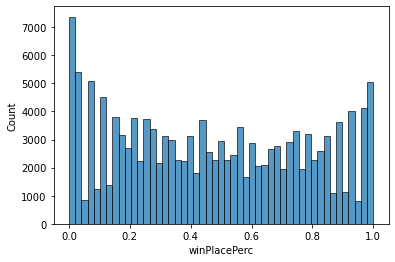

In [14]:
print(new_df3.matchId.value_counts())

sns.histplot(data = new_df4, x = "winPlacePerc")
plt.show()

In [11]:
# Regrouping dummy variables in "new_df3" dataframe

new_df3["is_solo"] = new_df3.matchType_solo + new_df3["matchType_solo-fpp"]
new_df3["is_duo"] = new_df3.matchType_duo + new_df3["matchType_duo-fpp"]
new_df3["is_squad"] = new_df3.matchType_squad + new_df3["matchType_squad-fpp"]

print("Number of rows in new_df3:")
print(len(new_df3))
print()
print("Unique values in is_solo:")
print(new_df3.is_solo.sum())
print()
print("Unique values in is_duo:")
print(new_df3.is_duo.sum())
print()
print("Unique values in is_squad:")
print(new_df3.is_squad.sum())
print()

Number of rows in new_df3:
141300

Unique values in is_solo:
13100

Unique values in is_duo:
28000

Unique values in is_squad:
100200



In [12]:
#Dropping irrelevant columns from "new_df3"

new_df4 = new_df3.drop(columns = ["Id", "groupId", "matchId", "matchType_duo", "matchType_duo-fpp", "matchType_solo", "matchType_solo-fpp", "matchType_squad", "matchType_squad-fpp"])

print("Number of rows in new_df4")
print(len(new_df4))
print()
print(new_df4.head())

Number of rows in new_df4
141300

   assists  boosts  damageDealt  DBNOs  headshotKills  heals  killPlace  \
0        1       0        228.4      1              0      3         14   
1        0       0          0.0      0              0      0         62   
2        0       2          0.0      0              0      3         57   
3        0       0          0.0      0              0      0         95   
4        0       0          0.0      0              0      0         60   

   killPoints  kills  killStreaks  ...  swimDistance  teamKills  \
0           0      3            2  ...           0.0          0   
1           0      0            0  ...           0.0          0   
2           0      0            0  ...           0.0          0   
3           0      0            0  ...           0.0          0   
4           0      0            0  ...           0.0          0   

   vehicleDestroys  walkDistance  weaponsAcquired  winPoints  winPlacePerc  \
0                0        901.00  

In [239]:
# Examining new_df4 and applying lambda function to .describe to avoid pandas from displaying scientific data values for integer values

print(new_df4.describe().apply(lambda x: x.apply('{0:.8f}'.format)))

               assists           boosts      damageDealt            DBNOs  \
count  141300.00000000  141300.00000000  141300.00000000  141300.00000000   
mean        0.25646143       1.05551309     131.09622483       0.75111111   
std         0.60320396       1.64409182     164.10634004       1.19798283   
min         0.00000000       0.00000000       0.00000000       0.00000000   
25%         0.00000000       0.00000000       0.00000000       0.00000000   
50%         0.00000000       0.00000000      87.36000000       0.00000000   
75%         0.00000000       2.00000000     188.20000000       1.00000000   
max         8.00000000      21.00000000    2339.00000000      18.00000000   

         headshotKills            heals        killPlace       killPoints  \
count  141300.00000000  141300.00000000  141300.00000000  141300.00000000   
mean        0.21968153       1.34398443      50.50000000     598.06329087   
std         0.56602428       2.60484119      28.86617219     653.53689226  

In [240]:
#Checking for null values

print(new_df4.isnull().sum())

assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
is_solo            0
is_duo             0
is_squad           0
dtype: int64


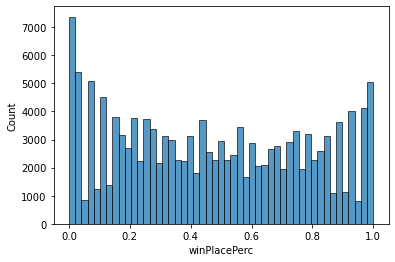

In [13]:
# Checking the distribution of winPlacePerc column.


sns.histplot(data = new_df4, x = "winPlacePerc")
plt.show()

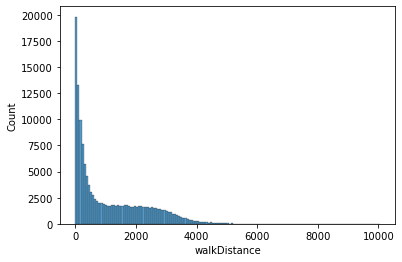

<Figure size 432x288 with 0 Axes>

In [242]:
sns.histplot(data = new_df4, x = "walkDistance")
plt.show()
plt.clf()

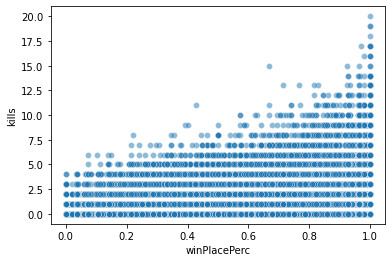

<Figure size 432x288 with 0 Axes>

In [243]:
sns.scatterplot(x = "winPlacePerc", y = "kills", data = new_df4, alpha = 0.5)
plt.show()
plt.clf()

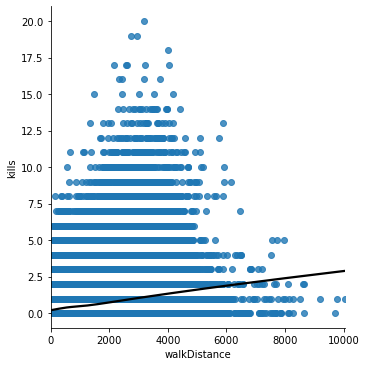

<Figure size 432x288 with 0 Axes>

In [245]:
sns.lmplot(x = "walkDistance", y = "kills", data = new_df4, line_kws = {"color": "black"}, lowess = True)
plt.show()
plt.clf()

In [9]:
# Splitting the data into train and test

X = new_df4[["assists", "boosts", "damageDealt", "DBNOs", "headshotKills", "heals", "killPlace", "killPoints", "kills", "killStreaks", "longestKill", "matchDuration", "maxPlace", "numGroups", "rankPoints", "revives", "rideDistance", "roadKills", "swimDistance", "teamKills", "vehicleDestroys", "walkDistance", "weaponsAcquired", "winPoints", "is_solo", "is_duo", "is_squad"]]

y = new_df4.winPlacePerc

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 6)

print("Number of rows in X_train:")
print(len(X_train))
print()
print(X_train)
print()
print(y_train)
print(y_train.value_counts())
print()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Number of rows in X_train:
113040

        assists  boosts  damageDealt  DBNOs  headshotKills  heals  killPlace  \
32366         0       0        65.99      0              0      1         62   
19660         0       0       175.90      0              0      0         93   
137680        0       0         0.00      0              0      0         67   
99141         0       0         0.00      1              0      0         76   
26527         0       0       100.00      1              0      0         37   
...         ...     ...          ...    ...            ...    ...        ...   
87321         1       1        70.96      0              0      1         60   
41295         0       1       135.80      0              0      1         50   
4714          0       1       123.40      0              1      1         44   
41187         0       0        60.06      0              0      0         66   
117449        0       2       100.00      0              0      0         35   

    

In [88]:
# Creating test set from the full dataset "train"

# Dropping null values
train2 = train.dropna()

# Create dummy variable for "matchType"
train2 = pd.get_dummies(train2, columns = ["matchType"])

# Regrouping dummy variables in "train2" dataframe
train2["is_solo"] = train2.matchType_solo + train2["matchType_solo-fpp"]
train2["is_duo"] = train2.matchType_duo + train2["matchType_duo-fpp"]
train2["is_squad"] = train2.matchType_squad + train2["matchType_squad-fpp"]

# Dropping irrelevant columns
train2 = train2.drop(columns = ["Id", "groupId", "matchId", "matchType_crashfpp", "matchType_crashtpp", "matchType_duo", "matchType_duo-fpp", "matchType_flarefpp", "matchType_flaretpp", "matchType_normal-duo", "matchType_normal-duo-fpp", "matchType_normal-solo", "matchType_normal-solo-fpp", "matchType_normal-squad", "matchType_normal-squad-fpp", "matchType_solo", "matchType_solo-fpp", "matchType_squad", "matchType_squad-fpp"])

# Generating full dataset test
X_test2 = train2[["assists", "boosts", "damageDealt", "DBNOs", "headshotKills", "heals", "killPlace", "killPoints", "kills", "killStreaks", "longestKill", "matchDuration", "maxPlace", "numGroups", "rankPoints", "revives", "rideDistance", "roadKills", "swimDistance", "teamKills", "vehicleDestroys", "walkDistance", "weaponsAcquired", "winPoints", "is_solo", "is_duo", "is_squad"]]
y_test2 = train2.winPlacePerc

# Display train 2
print("Number of rows in train2:")
print(len(train2))
print()
print(train2.head())


Number of rows in train2:
4446965

   assists  boosts  damageDealt  DBNOs  headshotKills  heals  killPlace  \
0        0       0         0.00      0              0      0         60   
1        0       0        91.47      0              0      0         57   
2        1       0        68.00      0              0      0         47   
3        0       0        32.90      0              0      0         75   
4        0       0       100.00      0              0      0         45   

   killPoints  kills  killStreaks  longestKill  matchDuration  maxPlace  \
0        1241      0            0         0.00           1306        28   
1           0      0            0         0.00           1777        26   
2           0      0            0         0.00           1318        50   
3           0      0            0         0.00           1436        31   
4           0      1            1        58.53           1424        97   

   numGroups  rankPoints  revives  rideDistance  roadKills  swi

In [91]:
# Multiple Linear Regression: Using model 1 "mlr1" to make predictions for small dataset as well as full dataset

mlr1 = LinearRegression()
mlr1.fit(X_train, y_train)

X_names = ["assists", "boosts", "damageDealt", "DBNOs", "headshotKills", "heals", "killPlace", "killPoints", "kills", "killStreaks", "longestKill", "matchDuration", "maxPlace", "numGroups", "rankPoints", "revives", "rideDistance", "roadKills", "swimDistance", "teamKills", "vehicleDestroys", "walkDistance", "weaponsAcquired", "winPoints", "is_solo", "is_duo", "is_squad"]

y1_predicted = mlr1.predict(X_test)
y2_predicted = mlr1.predict(X_test2)
print(y1_predicted)
print(y2_predicted)
print()
print("R-squared score of training data:")
print(mlr1.score(X_train, y_train))
print()
print()
print()
print("R-squared score of testing data:")
print(mlr1.score(X_test, y_test))
print()
print("MSE score of testing data:")
print(mean_squared_error(y_test, y_predicted))
print()
print("MAE score of testing data:")
print(mean_absolute_error(y_test, y_predicted))
print()
print()
print()
print("R-squared score of entire dataset:")
print(mlr1.score(X_test2, y_test2))
print()
print("MSE score of testing the entire dataset:")
print(mean_squared_error(y_test2, y2_predicted))
print()
print("MAE score of testing the entire dataset:")
print(mean_absolute_error(y_test2, y2_predicted))
print()
print()
print()
print("Coefficients of mlr1:")
for i in list(zip(X_names, mlr1.coef_)):
    print(i)
print()
print("Intercept of mlr1:")
print(mlr1.intercept_)


'''Coefficients are most helpful in determining which independent variable carries more weight. 
For example, a coefficient of -1.345 will impact the rent more than a coefficient of 0.238, 
with the former impacting prices negatively and latter positively.'''

[0.33869859 0.4527212  0.56768736 ... 0.78141909 0.50371512 0.55139188]
[0.34971688 0.48843224 0.50475031 ... 0.41929474 0.96114684 0.69830712]

R-squared score of training data:
0.8386580232989733



R-squared score of testing data:
0.841436072725187

MSE score of testing data:
0.014868205010983983

MAE score of testing data:
0.089525221005323



R-squared score of entire dataset:
0.8279339714183743

MSE score of testing the entire dataset:
0.01625986141793642

MAE score of testing the entire dataset:
0.09402139605432194



Coefficients of mlr1:
('assists', 0.011215310347516627)
('boosts', 0.01476085129526373)
('damageDealt', 8.292549305104647e-05)
('DBNOs', -0.010399654710346498)
('headshotKills', -0.0003185622960041365)
('heals', 0.0004481910299225142)
('killPlace', -0.0073798775955785725)
('killPoints', -4.551487194032589e-05)
('kills', -0.01545562417799348)
('killStreaks', -0.15353040313097496)
('longestKill', 9.566929858822508e-07)
('matchDuration', -0.00016132343473365874)
('max

'Coefficients are most helpful in determining which independent variable carries more weight. \nFor example, a coefficient of -1.345 will impact the rent more than a coefficient of 0.238, \nwith the former impacting prices negatively and latter positively.'

In [68]:
# Multicollinearity
  
x_mc = new_df4[["assists", "boosts", "damageDealt", "DBNOs", "headshotKills", "heals", "killPlace", "killPoints", "kills", "killStreaks", "longestKill", "matchDuration", "maxPlace", "numGroups", "rankPoints", "revives", "rideDistance", "roadKills", "swimDistance", "teamKills", "vehicleDestroys", "walkDistance", "weaponsAcquired", "winPoints", "is_solo", "is_duo", "is_squad"]]

vif_data = pd.DataFrame()
vif_data["feature"] = x_mc.columns

vif_data["VIF"] = [variance_inflation_factor(x_mc.values, i) for i in range(len(x_mc.columns))]

print(vif_data)
    

# creating dummies for gender
# data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
  
# # the independent variables set
# X = data[['Gender', 'Height', 'Weight']]
  
# VIF dataframe
# vif_data = pd.DataFrame()
# vif_data["feature"] = X.columns
  
# # calculating VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(X.values, i)
#                           for i in range(len(X.columns))]
  
# print(vif_data)

            feature         VIF
0           assists    1.278177
1            boosts    2.396934
2       damageDealt    5.763173
3             DBNOs    3.595706
4     headshotKills    1.773313
5             heals    1.508791
6         killPlace    5.535639
7        killPoints   30.387964
8             kills    8.165870
9       killStreaks    5.235239
10      longestKill    1.754302
11    matchDuration    1.328572
12         maxPlace  823.213430
13        numGroups  428.945932
14       rankPoints  106.612814
15          revives    1.168261
16     rideDistance    1.411422
17        roadKills    1.013330
18     swimDistance    1.037287
19        teamKills    1.027698
20  vehicleDestroys    1.031849
21     walkDistance    2.700986
22  weaponsAcquired    1.692842
23        winPoints  146.372310
24          is_solo  889.601521
25           is_duo  551.231994
26         is_squad  891.901991


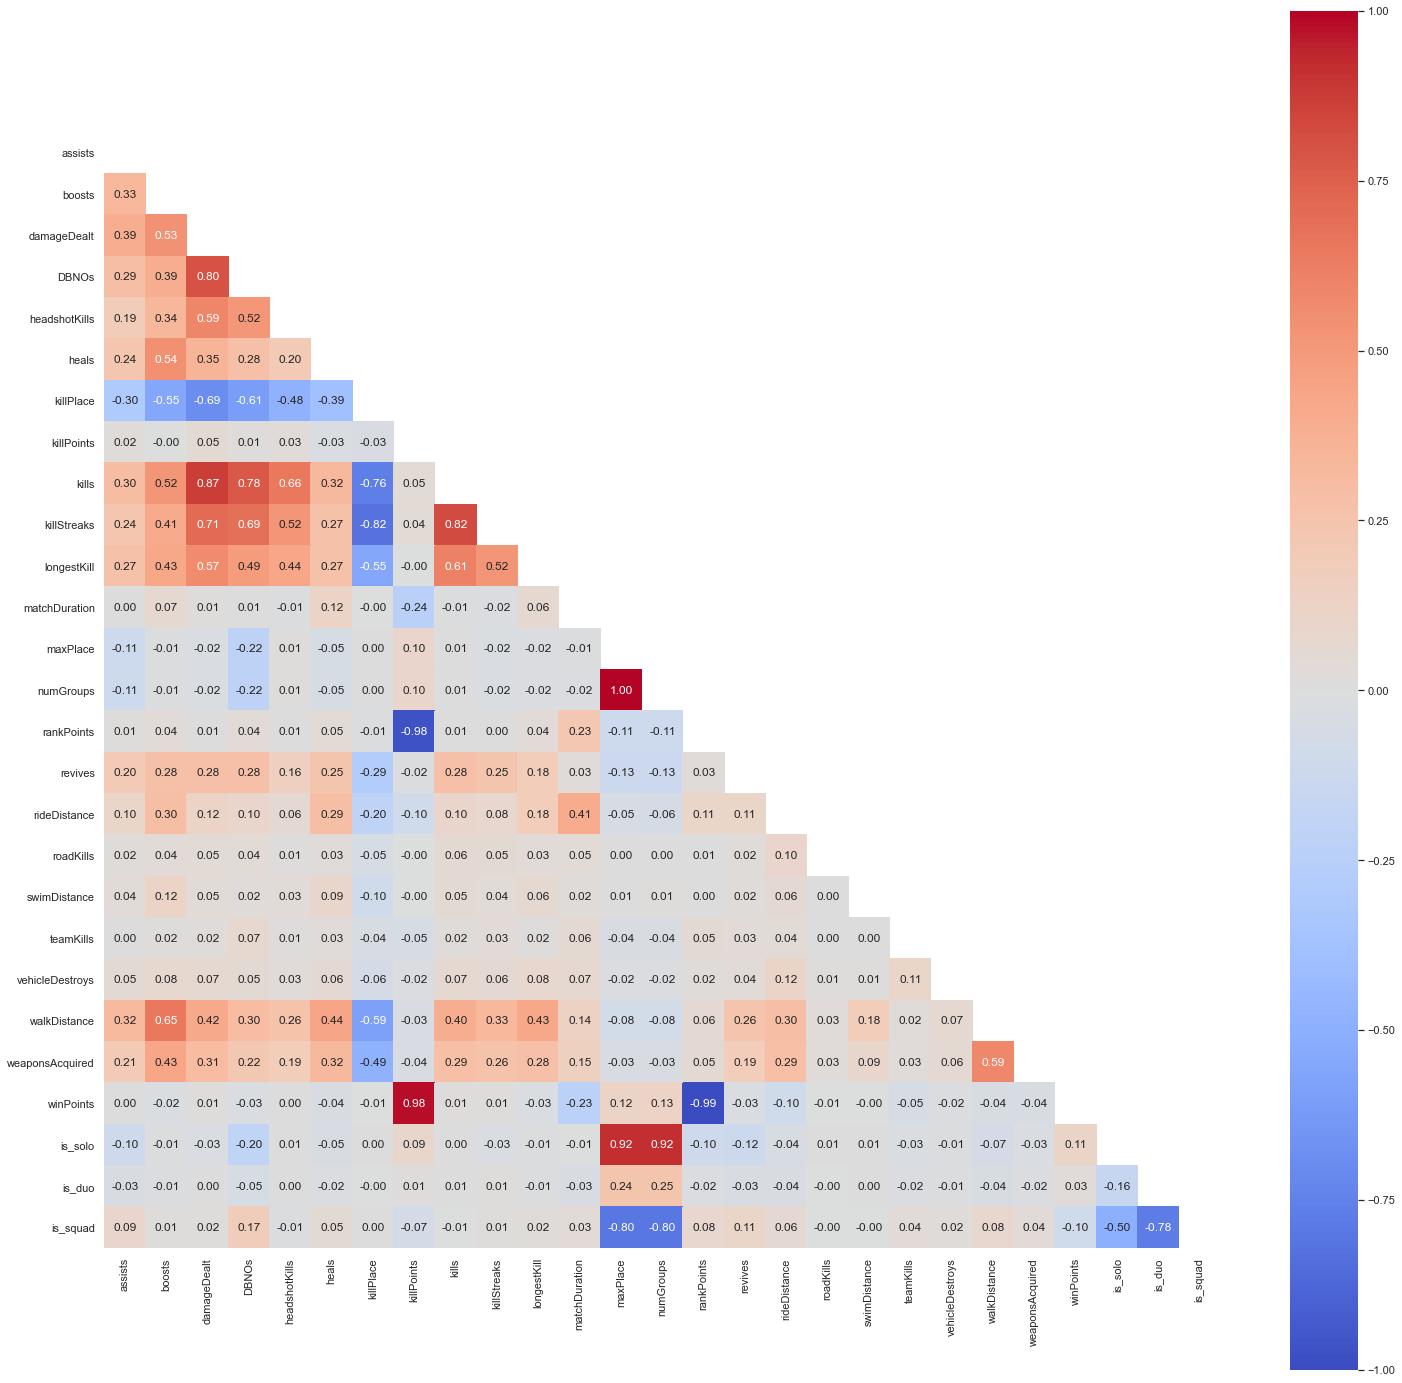

In [93]:
x_mc2 = new_df4[["assists", "boosts", "damageDealt", "DBNOs", "headshotKills", "heals", "killPlace", "killPoints", "kills", "killStreaks", "longestKill", "matchDuration", "maxPlace", "numGroups", "rankPoints", "revives", "rideDistance", "roadKills", "swimDistance", "teamKills", "vehicleDestroys", "walkDistance", "weaponsAcquired", "winPoints", "is_solo", "is_duo", "is_squad"]]


# correlation matrix heatmap visualization
sns.set(style="white")

# Generate a mask for the upper triangle
matrix = np.triu(x_mc2.corr())

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(25,25))

# Plot the heatmap
_ = sns.heatmap(x_mc2.corr(), mask=matrix, annot=True, annot_kws={"size": 12}, square=True, 
                cmap='coolwarm' , vmin=-1, vmax=1, fmt='.2f')  # annot=True display corr label

# _ = sns.heatmap(df.corr(), annot=True, annot_kws={"size": 12}, square=True, 
#                 cmap='coolwarm' , vmin=-1, vmax=1, fmt='.2f')

# Prevent Heatmap Cut-Off Issue
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom+0.5, top-0.5)

In [98]:
# Improving model 1 "mlr1" by removing columns. This will be called model 2 "mlr2"
# Original list ["assists", "boosts", "damageDealt", "DBNOs", "headshotKills", "heals", "killPlace", "killPoints", "kills", "killStreaks", "longestKill", "matchDuration", "maxPlace", "numGroups", "rankPoints", "revives", "rideDistance", "roadKills", "swimDistance", "teamKills", "vehicleDestroys", "walkDistance", "weaponsAcquired", "winPoints", "is_solo", "is_duo", "is_squad"]

# Removed based on VIF
# damageDealt, killPlace, killPoints, kills, killStreaks, maxPlace, numGroups, rankPoints, winPoints

# Removed based on heatmap
# damageDealt, killPlace, killPoints, kills, killStreaks maxPlace, numGroups, rankPoints, winPoints, is_solo?, is_squad?

# Based on logic
# longestKill, rankPoints, swimDistance, teamKills, vehicleDestroys, numGroups, maxPlace
# ["assists", "boosts", "damageDealt", "DBNOs", "headshotKills", "heals", "killPlace", "killPoints", "kills", "killStreaks", "matchDuration", "revives", "rideDistance", "roadKills", "walkDistance", "weaponsAcquired", "winPoints", "is_solo", "is_duo", "is_squad"]


X_train3 = X_train[["assists", "boosts", "damageDealt", "DBNOs", "headshotKills", "heals", "killPlace", "killPoints", "kills", "killStreaks", "matchDuration", "revives", "rideDistance", "roadKills", "walkDistance", "weaponsAcquired", "winPoints", "is_solo", "is_duo", "is_squad"]]
X_test3 = X_test[["assists", "boosts", "damageDealt", "DBNOs", "headshotKills", "heals", "killPlace", "killPoints", "kills", "killStreaks", "matchDuration", "revives", "rideDistance", "roadKills", "walkDistance", "weaponsAcquired", "winPoints", "is_solo", "is_duo", "is_squad"]]
X_test4 = X_test2[["assists", "boosts", "damageDealt", "DBNOs", "headshotKills", "heals", "killPlace", "killPoints", "kills", "killStreaks", "matchDuration", "revives", "rideDistance", "roadKills", "walkDistance", "weaponsAcquired", "winPoints", "is_solo", "is_duo", "is_squad"]]
X_names = ["assists", "boosts", "damageDealt", "DBNOs", "headshotKills", "heals", "killPlace", "killPoints", "kills", "killStreaks", "matchDuration", "revives", "rideDistance", "roadKills", "walkDistance", "weaponsAcquired", "winPoints", "is_solo", "is_duo", "is_squad"]

mlr2 = LinearRegression()
mlr2.fit(X_train3, y_train)

y3_predicted = mlr2.predict(X_test3)
y4_predicted = mlr2.predict(X_test4)
print(y3_predicted)
print(y4_predicted)
print()
print("R-squared score of training data:")
print(mlr2.score(X_train3, y_train))
print()
print()
print()
print("R-squared score of testing data:")
print(mlr2.score(X_test3, y_test))
print()
print("MSE score of testing data:")
print(mean_squared_error(y_test, y3_predicted))
print()
print("MAE score of testing data:")
print(mean_absolute_error(y_test, y3_predicted))
print()
print()
print()
print("R-squared score of entire dataset:")
print(mlr2.score(X_test4, y_test2))
print()
print("MSE score of testing the entire dataset:")
print(mean_squared_error(y_test2, y4_predicted))
print()
print("MAE score of testing the entire dataset:")
print(mean_absolute_error(y_test2, y4_predicted))
print()
print()
print()
print("Coefficients of mlr2:")
for i in list(zip(X_names, mlr2.coef_)):
    print(i)
print()
print("Intercept of mlr2:")
print(mlr2.intercept_)


'''Coefficients are most helpful in determining which independent variable carries more weight. 
For example, a coefficient of -1.345 will impact the rent more than a coefficient of 0.238, 
with the former impacting prices negatively and latter positively.'''

[0.31633111 0.45677787 0.55105566 ... 0.77922065 0.52037849 0.55280666]
[0.3803581  0.50836317 0.48830849 ... 0.42741921 0.9896859  0.67850951]

R-squared score of training data:
0.8332322252483709



R-squared score of testing data:
0.8357641112765408

MSE score of testing data:
0.015400052872488502

MAE score of testing data:
0.09195817039909847



R-squared score of entire dataset:
0.8138014092481547

MSE score of testing the entire dataset:
0.017595357472924

MAE score of testing the entire dataset:
0.09760718286998828



Coefficients of mlr2:
('assists', 0.008726988489513879)
('boosts', 0.01573311025707175)
('damageDealt', 0.00012114171047517615)
('DBNOs', -0.01972599529343669)
('headshotKills', -0.0003028917525806715)
('heals', 0.0002694853513902707)
('killPlace', -0.0075041745088625725)
('killPoints', -6.054217980250898e-05)
('kills', -0.012038262194691323)
('killStreaks', -0.15579037770029916)
('matchDuration', -0.00016186513918242003)
('revives', 0.00820711291350035)
('rideDis

'Coefficients are most helpful in determining which independent variable carries more weight. \nFor example, a coefficient of -1.345 will impact the rent more than a coefficient of 0.238, \nwith the former impacting prices negatively and latter positively.'

In [12]:
# Creating 2nd full training dataset "train"

# Dropping null values
# train3 = train.dropna()

# Create dummy variable for "matchType"
# train3 = pd.get_dummies(train3, columns = ["matchType"])

# Regrouping dummy variables in "train3" dataframe
# train3["is_solo"] = train3.matchType_solo + train3["matchType_solo-fpp"] + train3["matchType_normal-solo"] + train3["matchType_normal-solo-fpp"]
# train3["is_duo"] = train3.matchType_duo + train3["matchType_duo-fpp"] + train3["matchType_normal-duo"] + train3["matchType_normal-duo-fpp"]
# train3["is_squad"] = train3.matchType_squad + train3["matchType_squad-fpp"] + train3["matchType_normal-squad"] + train3["matchType_normal-squad-fpp"]
# train3["is_others"] = train3.matchType_crashfpp + train3.matchType_crashtpp + train3.matchType_flarefpp + train3.matchType_flaretpp

# Dropping irrelevant columns
# train3 = train3.drop(columns = ["Id", "groupId", "matchId", "matchType_crashfpp", "matchType_crashtpp", "matchType_duo", "matchType_duo-fpp", "matchType_flarefpp", "matchType_flaretpp", "matchType_normal-duo", "matchType_normal-duo-fpp", "matchType_normal-solo", "matchType_normal-solo-fpp", "matchType_normal-squad", "matchType_normal-squad-fpp", "matchType_solo", "matchType_solo-fpp", "matchType_squad", "matchType_squad-fpp"])

# # Generating full dataset test
# X_mlr_full = train3[["assists", "boosts", "damageDealt", "DBNOs", "headshotKills", "heals", "killPlace", "killPoints", "kills", "killStreaks", "longestKill", "matchDuration", "maxPlace", "numGroups", "rankPoints", "revives", "rideDistance", "roadKills", "swimDistance", "teamKills", "vehicleDestroys", "walkDistance", "weaponsAcquired", "winPoints", "is_solo", "is_duo", "is_squad", "is_others"]]
# y_mlr_full = train3.winPlacePerc

# # Splitting data
# X_train5, X_test5, y_train5, y_test5 = train_test_split(X_mlr_full, y_mlr_full, train_size = 0.8, test_size = 0.2, random_state = 10)

# # Display train 3
# print("Number of rows in train3:")
# print(len(train3))
# print()
# print(train3.head())

4446965


In [13]:
# Creating mlr model 3 "mlr3" to train and test on full dataset

mlr3 = LinearRegression()
mlr3.fit(X_train5, y_train5)

X_names5 = ["assists", "boosts", "damageDealt", "DBNOs", "headshotKills", "heals", "killPlace", "killPoints", "kills", "killStreaks", "longestKill", "matchDuration", "maxPlace", "numGroups", "rankPoints", "revives", "rideDistance", "roadKills", "swimDistance", "teamKills", "vehicleDestroys", "walkDistance", "weaponsAcquired", "winPoints", "is_solo", "is_duo", "is_squad", "is_others"]

y5_predicted = mlr3.predict(X_test5)
print(y5_predicted)
print()
print("R-squared score of training data:")
print(mlr3.score(X_train5, y_train5))
print()
print()
print()
print("R-squared score of testing data:")
print(mlr3.score(X_test5, y_test5))
print()
print("MSE score of testing data:")
print(mean_squared_error(y_test5, y5_predicted))
print()
print("MAE score of testing data:")
print(mean_absolute_error(y_test5, y5_predicted))
print()
print()
print()
print("Coefficients of mlr3:")
for i in list(zip(X_names5, mlr3.coef_)):
    print(i)
print()
print("Intercept of mlr3:")
print(mlr3.intercept_)


'''Coefficients are most helpful in determining which independent variable carries more weight. 
For example, a coefficient of -1.345 will impact the rent more than a coefficient of 0.238, 
with the former impacting prices negatively and latter positively.'''

[0.17232945 0.76760792 0.17060649 ... 0.578284   0.15593236 0.58926689]

R-squared score of training data:
0.8387253816237723



R-squared score of testing data:
0.8392603645794259

MSE score of testing data:
0.015193182165159243

MAE score of testing data:
0.09003598630364738



Coefficients of mlr3:
('assists', 0.014938855574176008)
('boosts', 0.013777772854945454)
('damageDealt', 7.093084502508812e-05)
('DBNOs', -0.007914066534525513)
('headshotKills', 0.001951830527683694)
('heals', 0.0006385532560278418)
('killPlace', -0.007416929253094903)
('killPoints', -4.389177485645165e-05)
('kills', -0.012919119198177852)
('killStreaks', -0.14727700841042357)
('longestKill', -1.9103379002953083e-06)
('matchDuration', -0.00016105743481816751)
('maxPlace', 0.0022230188793699386)
('numGroups', 0.004552623806365029)
('rankPoints', 0.0001083912492154578)
('revives', 0.012549459968259636)
('rideDistance', 1.7525825701961336e-05)
('roadKills', 0.017120571735060777)
('swimDistance', 0.00011030472169

'Coefficients are most helpful in determining which independent variable carries more weight. \nFor example, a coefficient of -1.345 will impact the rent more than a coefficient of 0.238, \nwith the former impacting prices negatively and latter positively.'

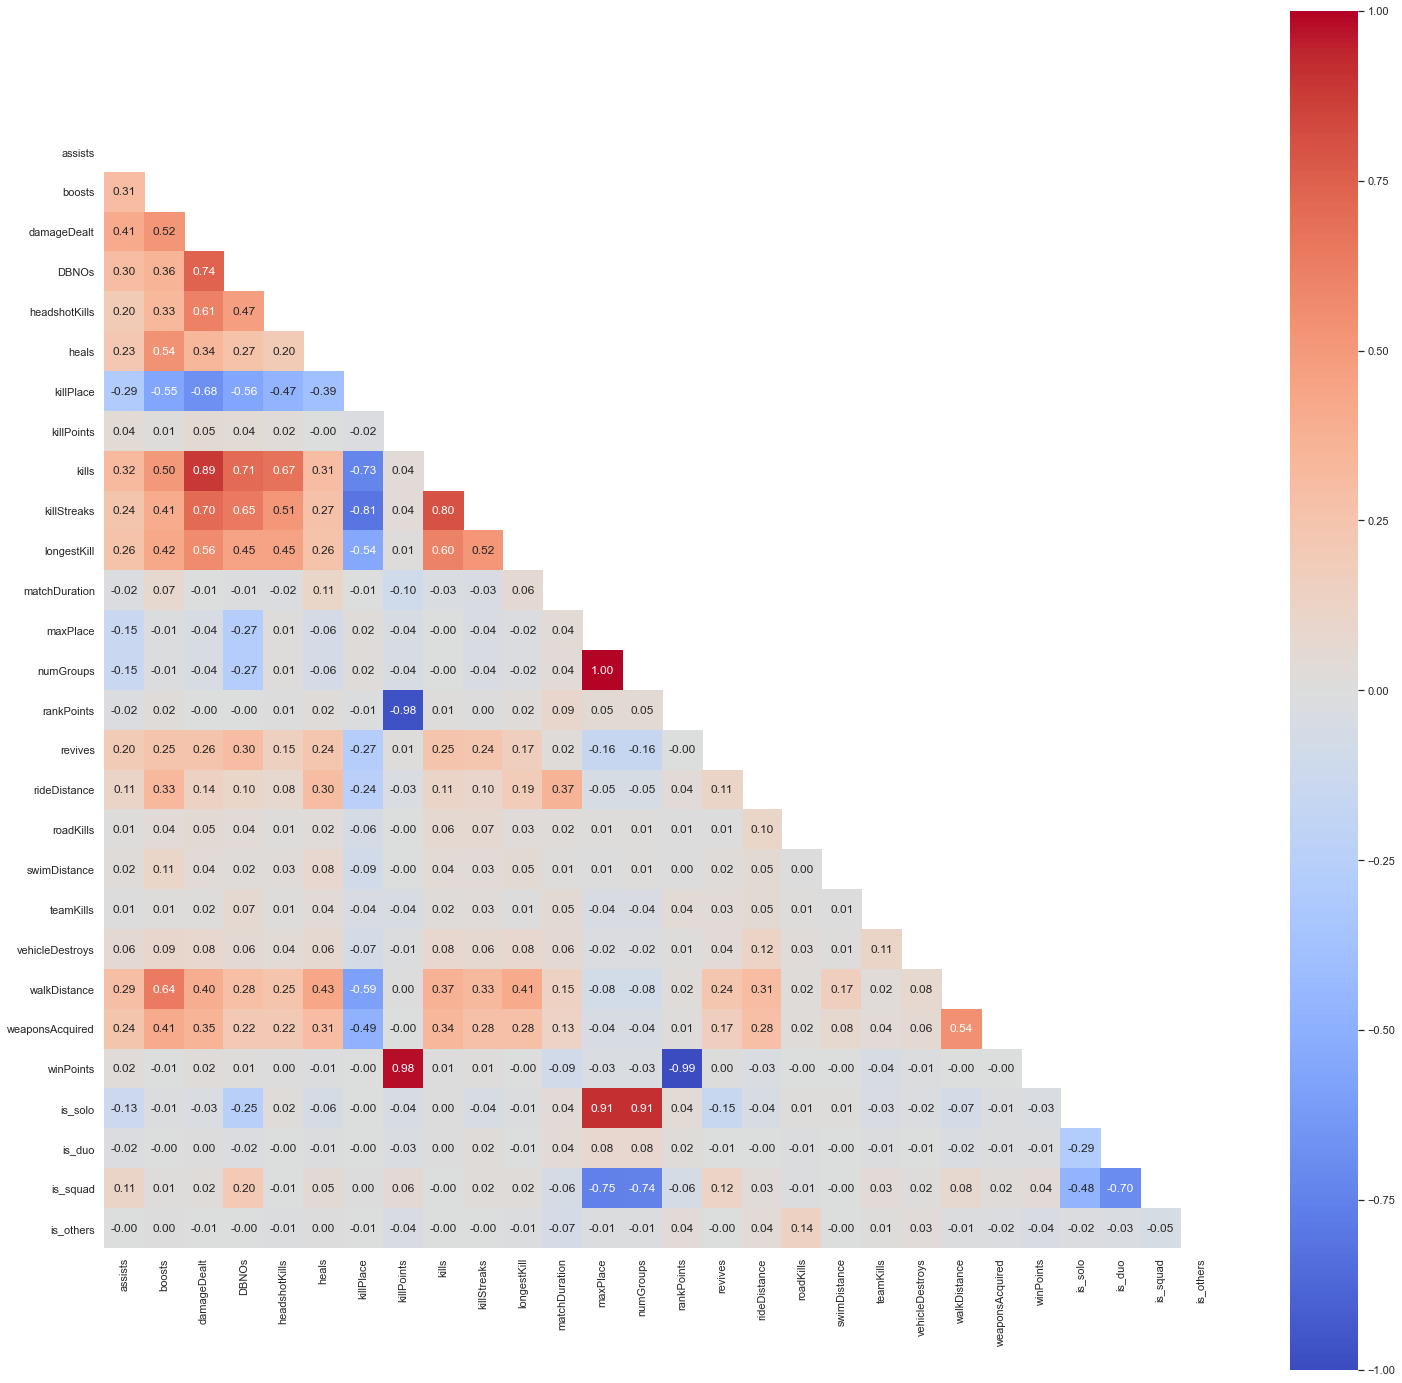

In [14]:
x_mc3 = train3[["assists", "boosts", "damageDealt", "DBNOs", "headshotKills", "heals", "killPlace", "killPoints", "kills", "killStreaks", "longestKill", "matchDuration", "maxPlace", "numGroups", "rankPoints", "revives", "rideDistance", "roadKills", "swimDistance", "teamKills", "vehicleDestroys", "walkDistance", "weaponsAcquired", "winPoints", "is_solo", "is_duo", "is_squad", "is_others"]]


# correlation matrix heatmap visualization
sns.set(style="white")

# Generate a mask for the upper triangle
matrix = np.triu(x_mc3.corr())

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(25,25))

# Plot the heatmap
_ = sns.heatmap(x_mc3.corr(), mask=matrix, annot=True, annot_kws={"size": 12}, square=True, 
                cmap='coolwarm' , vmin=-1, vmax=1, fmt='.2f')  # annot=True display corr label

# _ = sns.heatmap(df.corr(), annot=True, annot_kws={"size": 12}, square=True, 
#                 cmap='coolwarm' , vmin=-1, vmax=1, fmt='.2f')

# Prevent Heatmap Cut-Off Issue
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom+0.5, top-0.5)

In [16]:
# Improving model 3 "mlr3" by removing columns. This will be called model 4 "mlr4"
# Original list ["assists", "boosts", "damageDealt", "DBNOs", "headshotKills", "heals", "killPlace", "killPoints", "kills", "killStreaks", "longestKill", "matchDuration", "maxPlace", "numGroups", "rankPoints", "revives", "rideDistance", "roadKills", "swimDistance", "teamKills", "vehicleDestroys", "walkDistance", "weaponsAcquired", "winPoints", "is_solo", "is_duo", "is_squad", "is_others"]

# Removed based on heatmap
# damageDealt, killPlace, killPoints, kills, killStreaks maxPlace, numGroups, rankPoints, winPoints

# Based on logic
# longestKill, rankPoints, swimDistance, teamKills, vehicleDestroys, numGroups, maxPlace
# ["assists", "boosts", "damageDealt", "DBNOs", "headshotKills", "heals", "killPlace", "killPoints", "kills", "killStreaks", "matchDuration", "revives", "rideDistance", "roadKills", "walkDistance", "weaponsAcquired", "winPoints", "is_solo", "is_duo", "is_squad", "is_others"]


X_train6 = X_train5[["assists", "boosts", "damageDealt", "DBNOs", "headshotKills", "heals", "killPlace", "killPoints", "kills", "killStreaks", "matchDuration", "revives", "rideDistance", "roadKills", "walkDistance", "weaponsAcquired", "winPoints", "is_solo", "is_duo", "is_squad", "is_others"]]
X_test6 = X_test5[["assists", "boosts", "damageDealt", "DBNOs", "headshotKills", "heals", "killPlace", "killPoints", "kills", "killStreaks", "matchDuration", "revives", "rideDistance", "roadKills", "walkDistance", "weaponsAcquired", "winPoints", "is_solo", "is_duo", "is_squad", "is_others"]]

X_names6 = ["assists", "boosts", "damageDealt", "DBNOs", "headshotKills", "heals", "killPlace", "killPoints", "kills", "killStreaks", "matchDuration", "revives", "rideDistance", "roadKills", "walkDistance", "weaponsAcquired", "winPoints", "is_solo", "is_duo", "is_squad", "is_others"]

mlr4 = LinearRegression()
mlr4.fit(X_train6, y_train5)

y6_predicted = mlr4.predict(X_test6)
print(y6_predicted)
print()
print("R-squared score of training data:")
print(mlr4.score(X_train6, y_train5))
print()
print()
print()
print("R-squared score of testing data:")
print(mlr4.score(X_test6, y_test5))
print()
print("MSE score of testing data:")
print(mean_squared_error(y_test5, y6_predicted))
print()
print("MAE score of testing data:")
print(mean_absolute_error(y_test5, y6_predicted))
print()
print()
print()
print("Coefficients of mlr4:")
for i in list(zip(X_names6, mlr4.coef_)):
    print(i)
print()
print("Intercept of mlr4:")
print(mlr4.intercept_)


'''Coefficients are most helpful in determining which independent variable carries more weight. 
For example, a coefficient of -1.345 will impact the rent more than a coefficient of 0.238, 
with the former impacting prices negatively and latter positively.'''

[0.18802421 0.80513742 0.17891181 ... 0.58152121 0.17581809 0.58152836]

R-squared score of training data:
0.8262699164264639



R-squared score of testing data:
0.8268906624826113

MSE score of testing data:
0.016362371934651537

MAE score of testing data:
0.09294510786349278



Coefficients of mlr4:
('assists', 0.013176018288614954)
('boosts', 0.015005578074444312)
('damageDealt', 6.114060542420391e-05)
('DBNOs', -0.0072049869679926175)
('headshotKills', 0.0017508550121462004)
('heals', 0.0007670731363715261)
('killPlace', -0.006893694464118032)
('killPoints', -1.9241482625958787e-05)
('kills', -0.013664718526576998)
('killStreaks', -0.1314028013022621)
('matchDuration', -0.00017045583117554928)
('revives', 0.01276118347398895)
('rideDistance', 1.8264765416337543e-05)
('roadKills', 0.020452676605895347)
('walkDistance', 0.00011700765412788157)
('weaponsAcquired', 0.010941554252294317)
('winPoints', 1.6994774417220228e-05)
('is_solo', 0.047994724982254745)
('is_duo', 0.034395032381390

'Coefficients are most helpful in determining which independent variable carries more weight. \nFor example, a coefficient of -1.345 will impact the rent more than a coefficient of 0.238, \nwith the former impacting prices negatively and latter positively.'